In [1]:
from IPython.display import HTML
HTML('<iframe src=http://www.scholarpedia.org/article/Hopfield_network width=1000 height=350></iframe>')

In [2]:
import numpy as np #maths functions in python
import socket #to get host machine identity
import os # for joining paths and filenames sensibly
import glob #for finding files
import pylab as plt #graphing functions

#draw graphs in this notebook rather than in separate windows
%matplotlib inline

In [3]:
def from_jpg(name):
    #This function takes image files and converts them into a patter of numbers
    #We can then use this pattern of numbers to teach the Hopfield Network
    #need to make this so it forces square shape
    from PIL import Image
    size=40,40
    im = Image.open(name).convert('L')
    jm = im.resize(size,Image.ANTIALIAS)
    vals=np.array(jm.getdata())
    sgn = np.vectorize(lambda x: -1 if x<(255/2) else +1)
    return sgn(vals)

def to_pattern(letter):
    #This converts string to -1/+1 array
    from numpy import array
    return array([+1 if c=='X' else -1 for c in letter.replace('\n','')])
    
def display(pattern):
    #This shows a pattern of numbers as an image
    # - i.e it is the reverse of the 'from_jpg' function
    from pylab import imshow, cm, show
    side=int(np.sqrt(len(pattern)))    
    imshow(pattern.reshape((side,side)),cmap=cm.binary, interpolation='nearest')
    show()

def train(patterns):
    #This trains a network to remember the patterns it is given
    # - since it is important I'll comment each line
    from numpy import zeros, outer, diag_indices  #import functions for vector calculus
    r,c = patterns.shape #take the patters and make them vectors. There is a neuron for each pixel in the patterns
    W = zeros((c,c)) #there is a weight between each neuron in the network
    for p in patterns: # for each pattern
        W = W + outer(p,p) # change the weights to reflect the correlation between pixels
    W[diag_indices(c)] = 0 # neurons are not connected to themselves (ie the weight is 0)
    return W/r #send back the normalised weights
    
def recall(W, patterns, steps=5):
    #The tests the network. You give it a pattern and see what it produces
    from numpy import vectorize, dot #vector calculus functions
    sgn = vectorize(lambda x: -1 if x<0 else +1) # convert input pattern into a -1/+1 pattern
    for _ in range(steps): #over a number of iterations (defined by 'steps')    
        patterns = sgn(dot(patterns,W)) #adjust the neuron activity to reflect the weights
    return patterns #return the final pattern
    

def degrade(patterns,noise):
    #This allows you to add noise to a pattern
    sgn=np.vectorize(lambda x: x*-1 if np.random.random()<noise else x)
    out=sgn(patterns)
    return out

def degrade_weights(W,noise):
    #this function resets a proportion of the weights in the network
    sgn=vectorize(lambda x: 0 if random()<noise else x)
    return sgn(W)
    

def makepartial(p,proportion):
    u=int(proportion*len(p))
    new_p=p
    new_p[:u]=-1
    return new_p

In [4]:
files = glob.glob(os.path.join('patterns','*.jpg')) #where are the patterns stored?

#from these files, define patterns of numbers
patterns=np.array([from_jpg(p) for p in files]) #put individual patterns in array

#remember how large the patterns are
side=int(np.sqrt(len(patterns[0]))) #assume all patterns the same shape

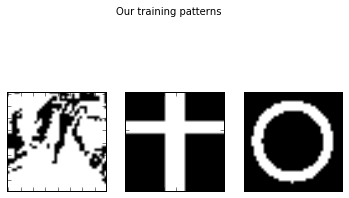

In [5]:
f, axarr = plt.subplots(1,len(patterns))

for p in range(len(patterns)):
    #axarr[0, p].imshow(patterns[p].reshape((side,side)),cmap=cm.binary, interpolation='nearest')
    axarr[p].imshow(patterns[p].reshape((side,side)), cmap="binary")
    #axarr[0, p].set_title('Cue' + str(p))
    
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[:]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:]], visible=False)
plt.suptitle('Our training patterns')
plt.savefig('trainingpatterns.png') #save a file

In [6]:
print ("train weights")

W = train(patterns)

train weights


test with originals


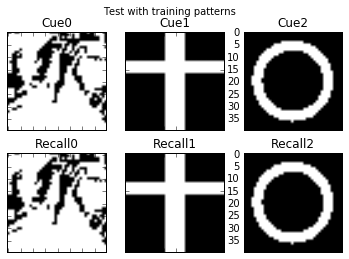

In [7]:
print ("test with originals")

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, len(patterns))

for p in range(len(patterns)):
    #axarr[0, p].imshow(patterns[p].reshape((side,side)),cmap=cm.binary, interpolation='nearest')
    axarr[0, p].imshow(patterns[p].reshape((side,side)), cmap="binary")
    axarr[0, p].set_title('Cue' + str(p))
    #axarr[1, p].imshow(recall(W,patterns)[p].reshape((side,side)),cmap=cm.binary, interpolation='nearest')
    axarr[1, p].imshow(recall(W,patterns)[p].reshape((side,side)), cmap="binary")
    axarr[1, p].set_title('Recall' + str(p))
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_xticklabels() for a in axarr[1, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 0]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
plt.suptitle('Test with training patterns')
plt.savefig('fullcue.png')

degrade patterns with noise 0.1


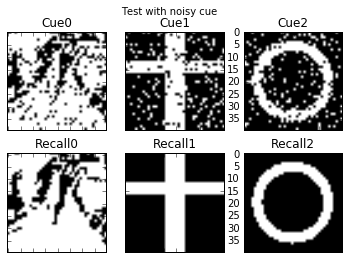

degrade patterns with noise 0.3


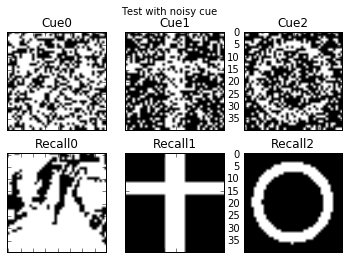

degrade patterns with noise 0.5


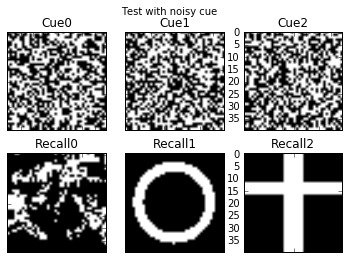

degrade patterns with noise 0.8


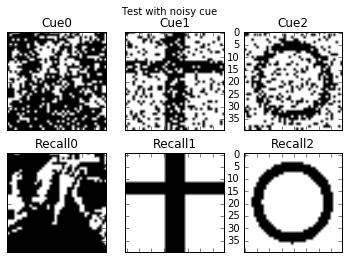

In [9]:
list_noise = [0.1,0.3,0.5,0.8]
for noise in  list_noise:

#reload original patterns. 
#There's some variable reference / variable copying thing I don't understand that makes this necessary
 patterns=np.array([from_jpg(p) for p in files]) #put individual patterns in array


 print ("degrade patterns with noise {}".format(noise))
 testpatterns=degrade(patterns,noise)

# Four axes, returned as a 2-d array
 f, axarr = plt.subplots(2, len(patterns))

 for p in range(len(testpatterns)):
    #axarr[0, p].imshow(patterns[p].reshape((side,side)),cmap=cm.binary, interpolation='nearest')
    axarr[0, p].imshow(testpatterns[p].reshape((side,side)), cmap="binary")
    axarr[0, p].set_title('Cue' + str(p))
    #axarr[1, p].imshow(recall(W,patterns)[p].reshape((side,side)),cmap=cm.binary, interpolation='nearest')
    axarr[1, p].imshow(recall(W,testpatterns,steps=1)[p].reshape((side,side)), cmap="binary")
    axarr[1, p].set_title('Recall' + str(p))
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
 plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
 plt.setp([a.get_xticklabels() for a in axarr[1, :]], visible=False)
 plt.setp([a.get_yticklabels() for a in axarr[:, 0]], visible=False)
 plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
 plt.suptitle('Test with noisy cue')
 plt.show()
 plt.savefig('noisycue{}.png'.format(noise))

Peut être un petit graphe sur l'évolution de l'output en fonction du nombre d'itérations ????

In [16]:

print ("test with partial cues")

proportion=0.4

#reload original patterns. 
#There's some variable reference / variable copying thing I don't understand that makes this necessary
patterns=np.array([from_jpg(p) for p in files]) #put individual patterns in array
   
testpatterns=[makepartial(p,proportion) for p in patterns]

test with partial cues


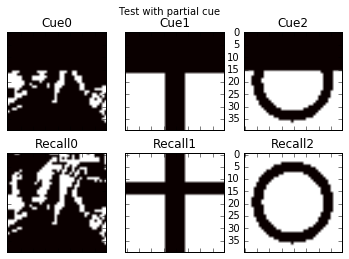

In [17]:
f, axarr = plt.subplots(2, len(testpatterns))

for p in range(len(testpatterns)):
    #axarr[0, p].imshow(patterns[p].reshape((side,side)),cmap=cm.binary, interpolation='nearest')
    axarr[0, p].imshow(testpatterns[p].reshape((side,side)), cmap="hot")
    axarr[0, p].set_title('Cue' + str(p))
    #axarr[1, p].imshow(recall(W,patterns)[p].reshape((side,side)),cmap=cm.binary, interpolation='nearest')
    axarr[1, p].imshow(recall(W,testpatterns)[p].reshape((side,side)), cmap="hot")
    axarr[1, p].set_title('Recall' + str(p))
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_xticklabels() for a in axarr[1, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 0]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
plt.suptitle('Test with partial cue')
plt.savefig('partialcue.png')

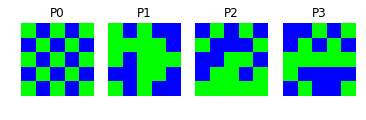

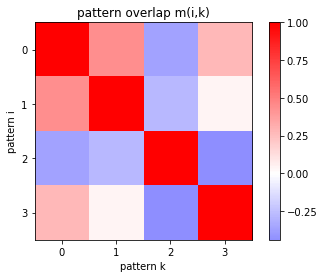

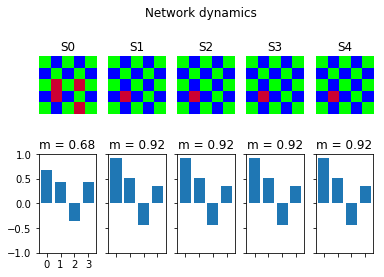

In [1]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")